de acordo com o LEIAME temos 2 listas uma test e uma Train, onde são com valores consecutivos (A, B, C, D, E) primeiro, vamos importar o pandas e retirar esses valores.

In [1]:
import pandas as pd

In [2]:
df_test = pd.read_csv('./iris-test.data', header=None)
testColumns = ['Comp_sep', 'Larg_sep', 'Comp_pet', 'Larg_pet', 'Classe']
columns = df_test.columns
df_test.columns = testColumns

In [3]:
df_test.head()

,Comp_sep,Larg_sep,Comp_pet,Larg_pet,Classe
0,4.8,3.0,1.4,0.3,Iris-setosa
1,5.1,3.8,1.6,0.2,Iris-setosa
2,4.6,3.2,1.4,0.2,Iris-setosa
3,5.3,3.7,1.5,0.2,Iris-setosa
4,5.0,3.3,1.4,0.2,Iris-setosa


In [4]:
df_train = pd.read_csv('./iris-train.data', header=None)
trainColumns = ['Comp_sep', 'Larg_sep', 'Comp_pet', 'Larg_pet', 'Classe']
df_train.columns = trainColumns

In [5]:
df_train.head()

,Comp_sep,Larg_sep,Comp_pet,Larg_pet,Classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Bem agora que demos **LOAD** em nossos arquivos e corrigimos seus headers, vamos ao próximo passo.

Primeiro vamos pensar como vamos identificar cada tipo de planta, vamos ver as classes disponiveis

In [6]:
df_train['Classe'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Temos 3 tipos de valores, Iris Setosa, Versicolor e Virginica. Como explicado em aula o ideal é transformarmos em uma valor numérico, vou me utilizar de uma lista com 3 valores [x,y,z] onde **x** é a **setosa**, **y** é a **versicolor** e **virginica** é **z**

In [99]:
classNum = [0, 0, 0] # se 1,0,0 é Setosa, se 0,1,0 é versicolor e se 0,0,1 é virginica.
def rotulo(classe_planta):
  if classe_planta == 'Iris-setosa':
    return [1, 0, 0]
  elif classe_planta == 'Iris-versicolor':
    return [0, 1, 0]
  elif classe_planta == 'Iris-virginica':
    return [0, 0, 1]
  else:
    print('Não reconhecido.')
    return 0
def derotulo(classe_num):
  if classe_num == 0:
    return 'Iris-setosa'
  elif classe_num == 1:
    return 'Iris-versicolor'
  elif classe_num == 2:
    return 'Iris-virginica'

Agora vou copiar os dataframes para poder modificar as classes para numérica e para normalizar os valores (por que SE tivermos valores muito distantes um dos outros como se o tamanho da petala for 15 e o miolo for decimais vai causar dificuldade na função, então o ideal é normalizar tudo.


In [8]:
train = df_train.copy()
test = df_test.copy()

In [9]:
train.head(3)

,Comp_sep,Larg_sep,Comp_pet,Larg_pet,Classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [10]:
test.head(3)

,Comp_sep,Larg_sep,Comp_pet,Larg_pet,Classe
0,4.8,3.0,1.4,0.3,Iris-setosa
1,5.1,3.8,1.6,0.2,Iris-setosa
2,4.6,3.2,1.4,0.2,Iris-setosa


Vamos adicionar uma "coluna numerica' para repassar as classes

In [11]:
test['cls_Numerada'] = test['Classe'].apply(rotulo)

In [12]:
test.head(3)

,Comp_sep,Larg_sep,Comp_pet,Larg_pet,Classe,cls_Numerada
0,4.8,3.0,1.4,0.3,Iris-setosa,"[1, 0, 0]"
1,5.1,3.8,1.6,0.2,Iris-setosa,"[1, 0, 0]"
2,4.6,3.2,1.4,0.2,Iris-setosa,"[1, 0, 0]"


Vamos fazer o mesmo na train:

In [13]:
train['cls_Numerada'] = train['Classe'].apply(rotulo)
train.head(5)

,Comp_sep,Larg_sep,Comp_pet,Larg_pet,Classe,cls_Numerada
0,5.1,3.5,1.4,0.2,Iris-setosa,"[1, 0, 0]"
1,4.9,3.0,1.4,0.2,Iris-setosa,"[1, 0, 0]"
2,4.7,3.2,1.3,0.2,Iris-setosa,"[1, 0, 0]"
3,4.6,3.1,1.5,0.2,Iris-setosa,"[1, 0, 0]"
4,5.0,3.6,1.4,0.2,Iris-setosa,"[1, 0, 0]"


Agora vamos normalizar os valores de cada coluna.

In [94]:
min_max_dict = {}
for col in train.columns[:-2]:
    min_x = train[col].min()
    max_x = train[col].max()
    min_max_dict[col] = (min_x, max_x)
    train[col] = (train[col] - min_x) / (max_x - min_x)

for col in test.columns[:-2]:
    min_x, max_x = min_max_dict[col]
    test[col] = (test[col] - min_x) / (max_x - min_x)

train.head(15)

,Comp_sep,Larg_sep,Comp_pet,Larg_pet,Classe,cls_Numerada
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa,"[1, 0, 0]"
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa,"[1, 0, 0]"
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa,"[1, 0, 0]"
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa,"[1, 0, 0]"
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa,"[1, 0, 0]"
5,0.305556,0.791667,0.118644,0.125000,Iris-setosa,"[1, 0, 0]"
6,0.083333,0.583333,0.067797,0.083333,Iris-setosa,"[1, 0, 0]"
7,0.194444,0.583333,0.084746,0.041667,Iris-setosa,"[1, 0, 0]"
8,0.027778,0.375000,0.067797,0.041667,Iris-setosa,"[1, 0, 0]"
9,0.166667,0.458333,0.084746,0.000000,Iris-setosa,"[1, 0, 0]"


agora vamos fazer para test

In [95]:
test.head(15)

,Comp_sep,Larg_sep,Comp_pet,Larg_pet,Classe,cls_Numerada
0,0.16,0.466667,0.021739,0.043478,Iris-setosa,"[1, 0, 0]"
1,0.28,1.000000,0.065217,0.000000,Iris-setosa,"[1, 0, 0]"
2,0.08,0.600000,0.021739,0.000000,Iris-setosa,"[1, 0, 0]"
3,0.36,0.933333,0.043478,0.000000,Iris-setosa,"[1, 0, 0]"
4,0.24,0.666667,0.021739,0.000000,Iris-setosa,"[1, 0, 0]"
5,0.24,0.800000,0.000000,0.043478,Iris-setosa,"[1, 0, 0]"
6,0.04,0.000000,0.000000,0.043478,Iris-setosa,"[1, 0, 0]"
7,0.00,0.600000,0.000000,0.000000,Iris-setosa,"[1, 0, 0]"
8,0.24,0.800000,0.065217,0.173913,Iris-setosa,"[1, 0, 0]"
9,0.28,1.000000,0.130435,0.086957,Iris-setosa,"[1, 0, 0]"


Perfeito! agora com tudo normalizado o que dá para fazer é, aplicar as fórmulas metamáticas para treino, eu fiz um algorimo desse treinado simples antes é só ir lendo a fórmula e ir repassando em código. Mas primeiros vamos fazer colocar o número de neuônios de entrada, neurônios de camada oculta e numero de neuronio de saida, o de saida são 3 por conta da lista que coloquei antes ([x,y,z])

In [16]:
neuronio = 4 # entrada (Comp_sep,	Larg_sep,	Comp_pet,	Larg_pet)
hidden = 6 # camada oculta
saida = 3 # saida é 3 por conta da classe ter 3 escolhas possiveis

Na atividade nós temos 4 entradas ou $x_1,x_2,x_3,x_4$ que se referem a Comp_sep,	Larg_sep,	Comp_pet,	Larg_pet.

Teremos a camada do meio ou hidden que vai fazer a primeira parte das equações (foward) até chegar no ŷ mas antes disso temos que declarar os $w$ - weights e o $b$ - bias, weights começaram de -1 a 1 e serão matrizes de hidden x neuronio para camada média e saida x hidden para camada de saida.

Já o bias ($b$) inicialmente faremos com 0 listas de zeros para evitar ruído na primeira passagem.

Após isso teremos uma lista com os erros ($\sigma$) para plotar depois em um gráfico.

para manter igual a fórmula matemática vou associar a variável x os dados para treino e y o resultado para treinar.

Lembrando que a saída é 3 valores que se referem a 'cls_numerada' onde:



*   [1,0,0] é Setosa
*   [0,1,0] é versicolor
*   [0,0,1] é virginica







In [82]:
## Treino
list_erros_saida = []
x = train.iloc[:, :4]
y = train['cls_Numerada']

Weight_camada_media = np.random.uniform(-1, 1, (hidden, neuronio)) ## Camada "oculta" - valores randomicos entre -1 e 1, matriz 6 por 4 (hidden x neuronio)
bias_media = np.zeros((hidden,))

Weight_camada_saida = np.random.uniform(-1, 1, (saida, hidden)) ## "Camada "saida" - valores randomicos entre -1 e 1, matriz 3 por 6 (saida x hidden)
bias_saida = np.zeros((saida,)) ## bias
epoca = 0
i = 0

for epoca in range(500):
  for i in range(len(train)):
    ## Foward
    z_media = np.dot(Weight_camada_media, x.iloc[i]) + bias_media
    sig = 1 / (1 + np.exp(-z_media))
    z_saida = np.dot(Weight_camada_saida,sig) + bias_saida
    y_hat = 1 / (1 + np.exp(-z_saida))
    ## Erro e Backward
    erro_saida = (y_hat - y.iloc[i]) * (y_hat * (1 - y_hat))
    list_erros_saida.append(np.mean(erro_saida)) # append para plotar depois
    erro_meio = ((Weight_camada_saida.T) @ erro_saida) * (sig*(1-sig))
    ## Update
    n = 0.1 #taxa de aprendizado
    ## Gradiente Descendente
    Weight_camada_saida = Weight_camada_saida - n * (erro_saida[:, None] @ sig[None, :])
    Weight_camada_media = Weight_camada_media - n * (erro_meio[:, None] @ x.iloc[i].values[None, :])
    bias_saida = bias_saida - n * erro_saida
    bias_media = bias_media - n * erro_meio
    i = i + 1
  print(f'Epoca ({epoca})')
  print("Pesos camada oculta:", Weight_camada_media)
  print("Bias camada oculta:", bias_media)
  print("Pesos camada saída:", Weight_camada_saida)
  print("Bias camada saída:", bias_saida)
  epoca = epoca + 1



A saída de streaming foi truncada nas últimas 5000 linhas.
Pesos camada saída: [[ 2.18788159 -1.70542773 -2.62202376  4.13112892 -2.53658105 -1.55703915]
 [-2.15251637  1.10753581 -0.2396458   1.73922665 -2.2232004   0.92249472]
 [-2.01178425  1.76235285  1.76095449 -5.62325868  1.53810439  0.88751302]]
Bias camada saída: [-0.54978328 -1.45526879 -1.17370891]
Epoca (84)
Pesos camada oculta: [[-0.04381302  1.80377086 -2.92545362 -1.75872422]
 [-0.04664485 -1.59211685  1.77823036  1.78377296]
 [-0.38662402 -0.73957519  1.8929715   1.54922323]
 [-0.87876733  2.33658156 -2.12106782 -4.34705257]
 [ 0.59531458  0.24822204  0.79489736  1.7502875 ]
 [ 0.75483761 -1.57701351  1.03147341  0.3683168 ]]
Bias camada oculta: [ 0.08148929  0.06304013 -0.72688647  3.40586755 -1.50773367  0.10330319]
Pesos camada saída: [[ 2.19803732 -1.71659155 -2.63082904  4.13330922 -2.54129214 -1.56505828]
 [-2.20134101  1.11960818 -0.24586833  1.78530805 -2.24601004  0.92424496]
 [-2.02019907  1.76891987  1.771779

In [109]:
# teste
x_test = test.iloc[:, :4]
y_test = test['cls_Numerada']
acertos = 0
for i in range(len(y_test)):
  z_teste_camada_media = Weight_camada_media @ x_test.iloc[i] + bias_media
  sig_test = 1 / (1 + np.exp(-z_teste_camada_media))
  z_teste_saida = Weight_camada_saida @ sig_test + bias_saida
  yhat_teste = 1 / (1 + np.exp(-z_teste_saida))
  chance = np.argmax(yhat_teste)
  print(f"Esperado: {derotulo(np.argmax(y_test.iloc[i]))}, Previsto: {derotulo(np.argmax(yhat_teste))} ({((yhat_teste[chance])*100):.2f}%)")
  if np.argmax(y_test.iloc[i]) == np.argmax(yhat_teste):
    acertos = acertos + 1
erros = len(y_test) - acertos
print('-'*30)
print(f'Acertos: {acertos}, Erros: {erros}')


Esperado: Iris-setosa, Previsto: Iris-setosa (98.49%)
Esperado: Iris-setosa, Previsto: Iris-setosa (99.50%)
Esperado: Iris-setosa, Previsto: Iris-setosa (99.15%)
Esperado: Iris-setosa, Previsto: Iris-setosa (99.45%)
Esperado: Iris-setosa, Previsto: Iris-setosa (99.18%)
Esperado: Iris-setosa, Previsto: Iris-setosa (99.36%)
Esperado: Iris-setosa, Previsto: Iris-setosa (92.02%)
Esperado: Iris-setosa, Previsto: Iris-setosa (99.24%)
Esperado: Iris-setosa, Previsto: Iris-setosa (98.87%)
Esperado: Iris-setosa, Previsto: Iris-setosa (99.30%)
Esperado: Iris-versicolor, Previsto: Iris-versicolor (97.38%)
Esperado: Iris-versicolor, Previsto: Iris-versicolor (95.41%)
Esperado: Iris-versicolor, Previsto: Iris-versicolor (96.78%)
Esperado: Iris-versicolor, Previsto: Iris-versicolor (98.64%)
Esperado: Iris-versicolor, Previsto: Iris-versicolor (95.55%)
Esperado: Iris-versicolor, Previsto: Iris-versicolor (87.77%)
Esperado: Iris-versicolor, Previsto: Iris-versicolor (88.47%)
Esperado: Iris-versicolor,

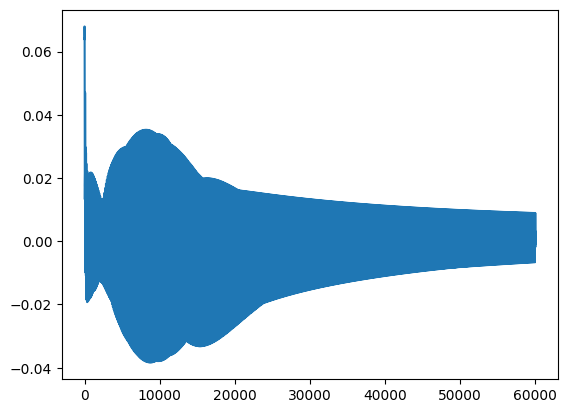

In [110]:
import matplotlib.pyplot as plt
plt.plot(list_erros_saida)